# Interpretability-effectiveness trade-off

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

sns.set(font_scale=1)
sns.set_style("whitegrid")
BASE_DATA_PATH = Path("../../../../ilmart-data/")
df = pd.read_csv(BASE_DATA_PATH / "tradeoff/eval.csv", index_col=0)
df

,dataset,max_interactions,max_tree_interactions,cutoff,ndcg,qidx
0,web30k,200,80,1,1.000000,0
1,web30k,200,80,1,0.200000,1
2,web30k,200,80,1,0.428571,2
3,web30k,200,80,1,0.428571,3
4,web30k,200,80,1,0.000000,4
...,...,...,...,...,...,...
1872877,web30k,60,100,10,0.593339,6301
1872878,web30k,60,100,10,0.917442,6302
1872879,web30k,60,100,10,0.721277,6303
1872880,web30k,60,100,10,0.477869,6304


In [3]:
df_lambdamart = pd.read_csv(BASE_DATA_PATH / "lambdamart/eval.csv", index_col=0)
df_lambdamart = df_lambdamart.drop(columns=["qidx"]).groupby(["dataset", "cutoff"]).mean().reset_index()
best_ndgc_10 = df_lambdamart[(df_lambdamart["cutoff"] == 10) & (df_lambdamart["dataset"] == "web30k")].iloc[0]["ndcg"]

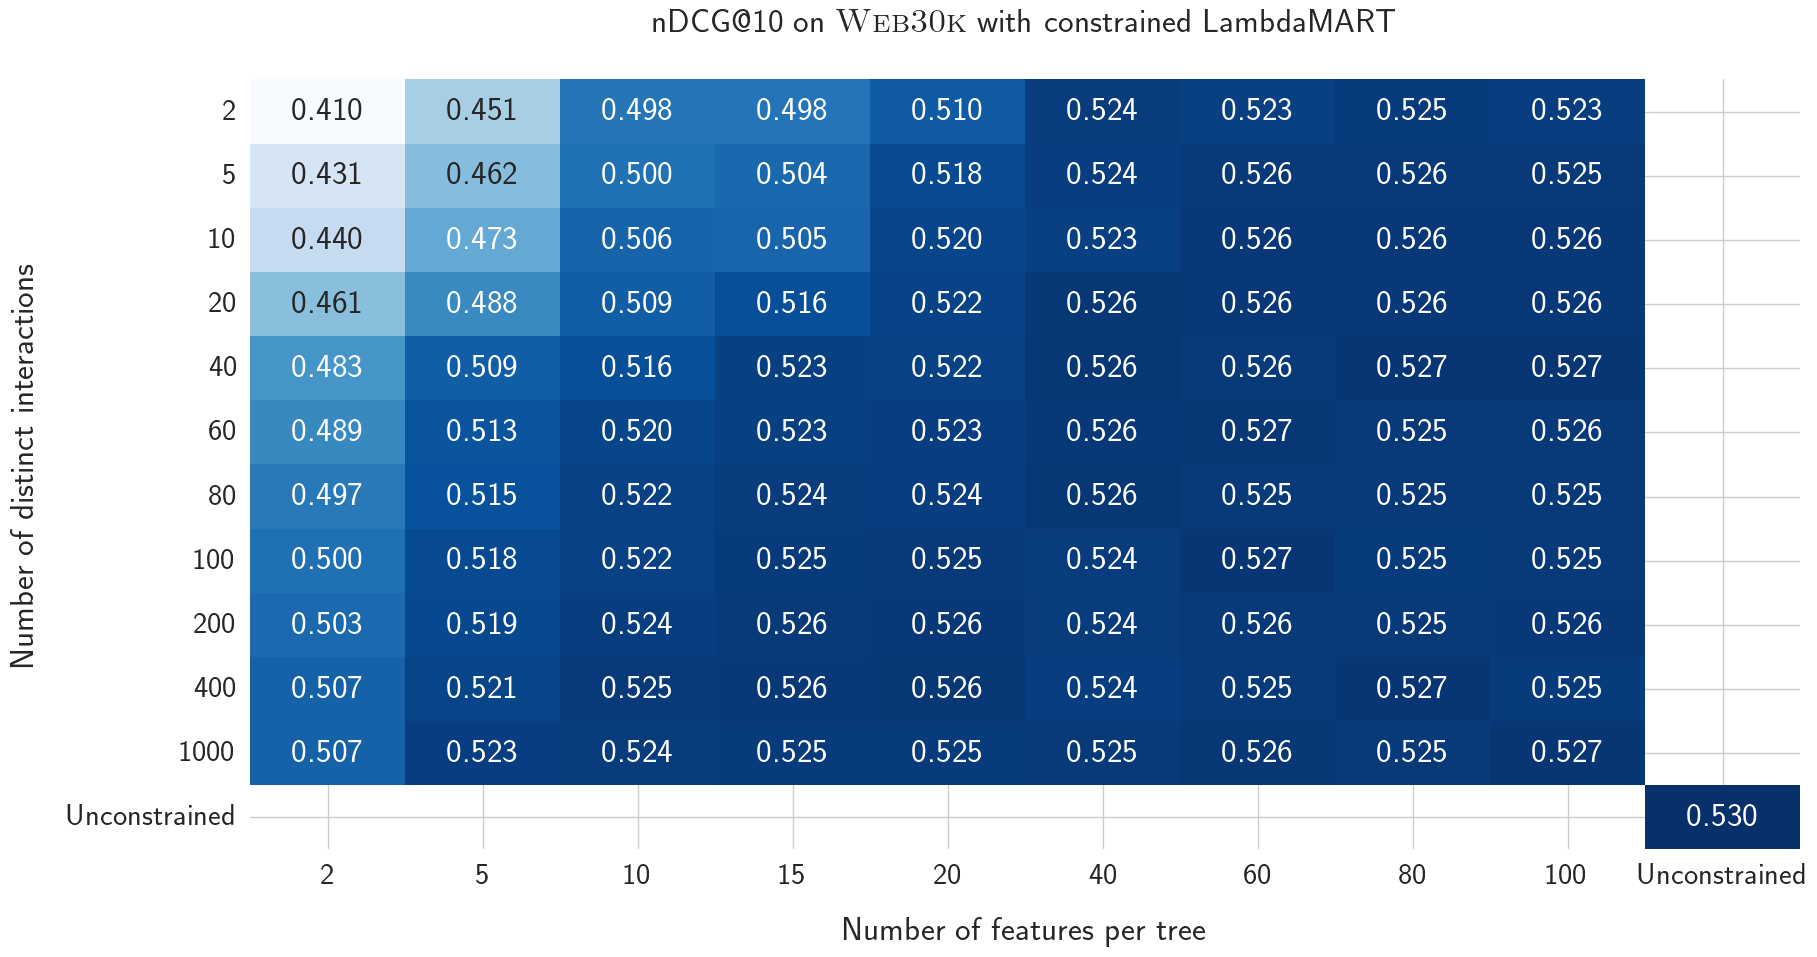

In [4]:
sns.set(font_scale=2, rc={'text.usetex': True}, style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
df_heatmap = df.drop(columns=["qidx"]).groupby(
    ["max_interactions", "max_tree_interactions", "dataset", "cutoff"]).mean().reset_index()

df_heatmap = pd.concat([df_heatmap, pd.DataFrame.from_dict({"max_interactions": ["Unconstrained"],
                                                  "max_tree_interactions": ["Unconstrained"],
                                                  "dataset": ["web30k"],
                                                  "cutoff": [10],
                                                  "ndcg": [best_ndgc_10]})])
df_heatmap = df_heatmap[df_heatmap["cutoff"] == 10].pivot(index="max_interactions", columns="max_tree_interactions",
                                                          values="ndcg")
ax = sns.heatmap(df_heatmap, annot=True, fmt=".3f", cmap="Blues", cbar=False, ax=ax)
ax.set_xlabel("Number of features per tree", labelpad=20)
ax.set_ylabel("Number of distinct interactions", labelpad=20)
ax.set_title(r"nDCG@10 on \textsc{Web30k} with constrained LambdaMART", y=1.05)
plt.savefig("plots/tradeoff_heatmap.pdf", bbox_inches="tight")

In [5]:
df_heatmap

max_tree_interactions,2,5,10,15,20,40,60,80,100,Unconstrained
max_interactions,,,,,,,,,,
2,0.410117,0.451489,0.497903,0.498171,0.510024,0.523916,0.522824,0.524739,0.523489,NaN
5,0.431080,0.461750,0.499786,0.503990,0.517798,0.523724,0.525556,0.525556,0.525199,NaN
10,0.440477,0.472552,0.506042,0.505304,0.520311,0.522715,0.526067,0.526067,0.526067,NaN
20,0.461401,0.488389,0.508762,0.515839,0.521538,0.526250,0.526206,0.526206,0.526206,NaN
40,0.483214,0.508891,0.515777,0.522738,0.522170,0.526332,0.525503,0.527258,0.527258,NaN
60,0.489143,0.512859,0.520036,0.522651,0.523413,0.525948,0.526530,0.524957,0.525661,NaN
80,0.496559,0.514885,0.522056,0.523973,0.523775,0.526331,0.525152,0.525421,0.525421,NaN
100,0.500118,0.517982,0.522169,0.524717,0.525370,0.524353,0.527470,0.524640,0.524875,NaN
200,0.503380,0.518979,0.523835,0.525565,0.526042,0.523924,0.525502,0.525389,0.525991,NaN


In [6]:
df = pd.read_csv(BASE_DATA_PATH / "tradeoff/ft/eval.csv", index_col=0)

In [7]:
df_to_plot = df.drop(columns=["query_id"]).groupby(
    ["max_interactions", "max_tree_interactions", "dataset", "cutoff"]).mean().reset_index()
df_to_plot = df_to_plot[df_to_plot["cutoff"] == 10]

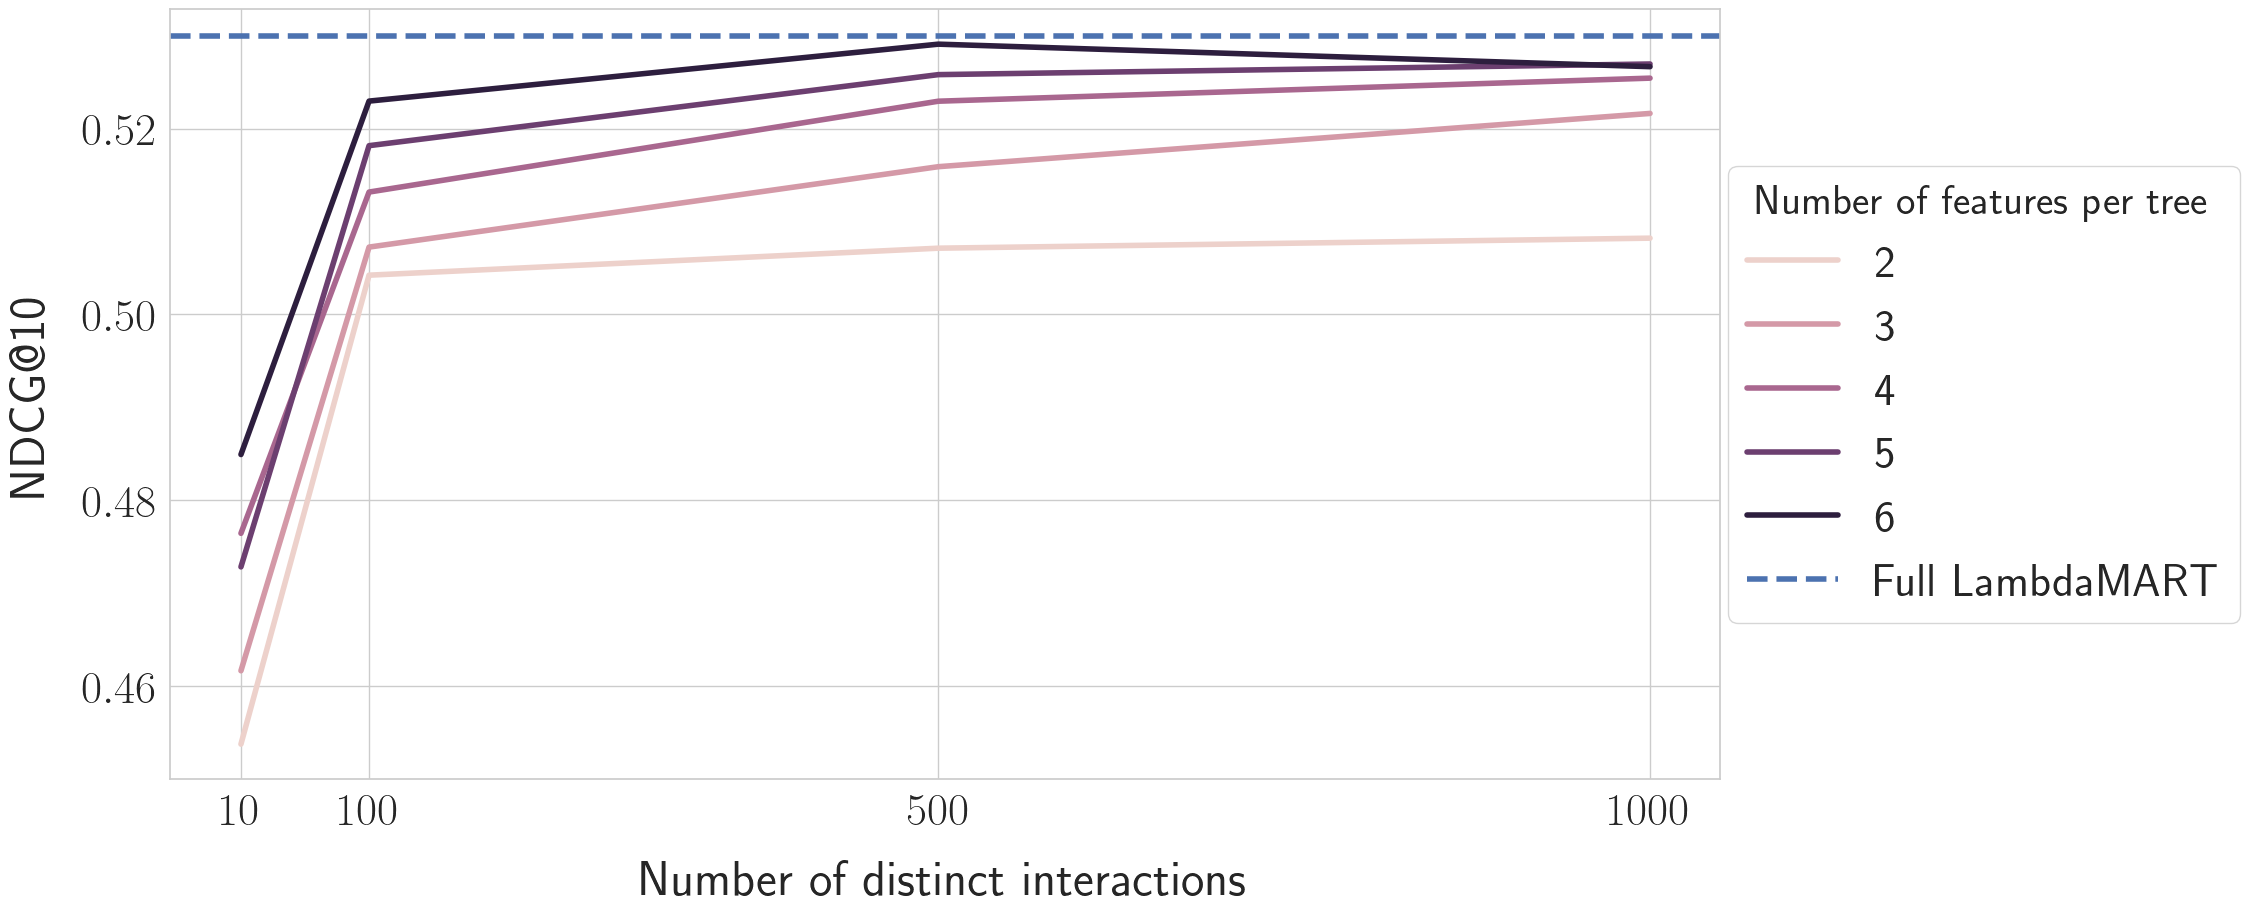

In [8]:
sns.set_theme(font_scale=3, style="whitegrid", rc={'text.usetex': True})
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.lineplot(data=df_to_plot, x="max_interactions", y="ndcg", hue="max_tree_interactions", linewidth=4)
hline_handle = ax.axhline(best_ndgc_10, ls='--', linewidth=4)
ax.set_xlabel("Number of distinct interactions", labelpad=20)
ax.set_ylabel("NDCG@10", labelpad=20)
handles, labels = ax.get_legend_handles_labels()
handles.append(hline_handle)
labels.append("Full LambdaMART")
ax.legend(handles=handles, labels=labels, title="Number of features per tree", title_fontsize=30, fontsize=30)
ax.set_xticks(df_to_plot["max_interactions"].unique())
sns.move_legend(ax, "center right", bbox_to_anchor=(1.35, 0.5))
plt.savefig("plots/tradeoff_ft.pdf", bbox_inches="tight")